In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Load preprocessed data

In [2]:
emg = np.load('emg_all.npy')
imu = np.load('imu_all.npy')
labels = np.load('labels_all.npy')
subjects = np.load('subjects_all.npy')
sessions = np.load('sessions_all.npy')

# EDA

In [3]:
emg = emg[labels<=2]
imu = imu[labels<=2]
subjects = subjects[labels<=2]
labels = labels[labels<=2]

In [4]:
left = [1,  2,  3,  6,  7, 12, 16, 17, 18, 20, 21, 23, 24, 27, 30] #1
right = [4,  5,  8,  9, 10, 11, 13, 14, 15, 19, 20, 21, 22, 25, 26, 28, 29, 31] #0

In [5]:
foot = np.zeros(len(subjects),dtype=int)
strong_foot = np.zeros(len(subjects),dtype=int)
i_foot = []
h_foot = []
for i in range(len(subjects)):
    if subjects[i] in right:
        foot[i] = 0
        strong_foot[i] = 4
        i_foot.append('right')
        h_foot.append('left')
    else:
        foot[i] = 4
        strong_foot[i] = 0
        i_foot.append('left')
        h_foot.append('right')

### EMG hamstrings high std for squat_fl

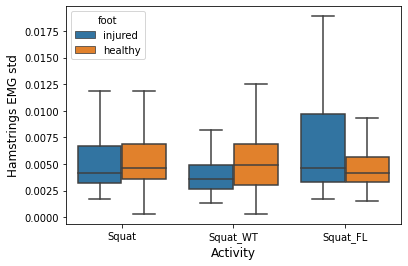

In [6]:
stds_i = np.zeros(len(foot))
stds_h = np.zeros(len(strong_foot))
for i in range(len(foot)):
    stds_i[i] = np.std(emg[i,foot[i]+1,:])
    stds_h[i] = np.std(emg[i,strong_foot[i]+1,:])
    
df = pd.DataFrame({'std':np.concatenate([stds_i,stds_h]),'foot':['injured']*len(foot)+['healthy']*len(strong_foot), 
                  'activity':np.concatenate([labels,labels])})

df['activity'].replace({0: 'Squat', 1: 'Squat_WT', 2: 'Squat_FL',},inplace=True)

g = sns.boxplot(data=df, x="activity",y='std',hue='foot',showfliers=False)
plt.xlabel('Activity', fontsize=12)
plt.ylabel('Hamstrings EMG std', fontsize=12)
plt.show()

g.figure.savefig('squat_fl_emg_std_hamstrings.png',dpi=300)

### EMG rectus femoris high std for squat_wt

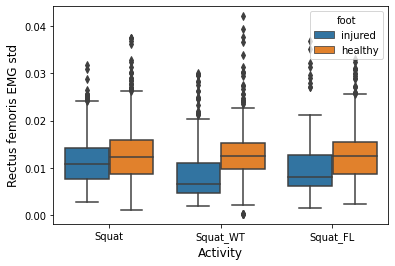

In [7]:
stds_i = np.zeros(len(foot))
stds_h = np.zeros(len(strong_foot))
for i in range(len(foot)):
    stds_i[i] = np.std(emg[i,foot[i],:])
    stds_h[i] = np.std(emg[i,strong_foot[i],:])
    
df = pd.DataFrame({'std':np.concatenate([stds_i,stds_h]),'foot':['injured']*len(foot)+['healthy']*len(strong_foot), 
                  'activity':np.concatenate([labels,labels])})
df['activity'].replace({0: 'Squat', 1: 'Squat_WT', 2: 'Squat_FL',},inplace=True)

g = sns.boxplot(data=df, x="activity",y='std',hue='foot',showfliers=True)
plt.xlabel('Activity', fontsize=12)
plt.ylabel('Rectus femoris EMG std', fontsize=12)
plt.show()

g.figure.savefig('squat_wt_emg_std.png',dpi=300)

### Z-axis eucledian distance between the legs for all IMUs

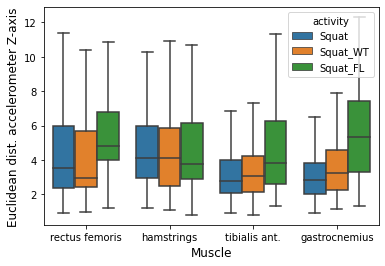

In [8]:
dists = []
activities = []

for i in range(24):

    if i in [2,8,14,20]:
        sq = np.sqrt(np.sum(np.square(imu[np.where(labels==0)[0],i]-imu[np.where(labels==0)[0],i+24]),1))
        sq_emg = np.sqrt(np.sum(np.square(imu[np.where(labels==1)[0],i]-imu[np.where(labels==1)[0],i+24]),1))
        sq_fl = np.sqrt(np.sum(np.square(imu[np.where(labels==2)[0],i]-imu[np.where(labels==2)[0],i+24]),1))
    else:
        continue
    
    dist = list(np.concatenate([sq,sq_emg,sq_fl]))
    activity = list(np.concatenate([labels[labels==0],labels[labels==1],labels[labels==2]]))
    
    dists = dists+dist
    activities = activities+activity
    
muscles = ['rectus femoris']*len(labels) + ['hamstrings']*len(labels) + ['tibialis ant.']*len(labels) + ['gastrocnemius']*len(labels) 


df = pd.DataFrame({'dist':dists, 'activity': activities,
                       'muscle':muscles})  
df['activity'].replace({0: 'Squat', 1: 'Squat_WT', 2: 'Squat_FL',},inplace=True)

g=sns.boxplot(x="muscle", y="dist", hue="activity", data=df,showfliers=False)
plt.xlabel('Muscle', fontsize=12)
plt.ylabel('Euclidean dist. accelerometer Z-axis', fontsize=12)
plt.show()

g.figure.savefig('squat_eucl_dist_z_axis.png',dpi=300)